<a href="https://colab.research.google.com/github/simsekergun/DATA601/blob/main/Lecture11_Statistics3/DATA601_Stats3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

Paper: Ray Fair, "A Theory of Extramarital Affairs," Journal of Political Economy, February, 45-61, 1978.

https://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf

### DATASET

In [ ]:
# We will use the "Fair" dataset. Let's check the source and notes
print(sm.datasets.fair.SOURCE, sm.datasets.fair.NOTE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm
 ::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agr

In [ ]:
df_fair = sm.datasets.fair.load_pandas().data

In [ ]:
df_fair.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [ ]:
df_fair.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


## Variance, Standard Deviation, Skewness, Covariance, Correlation
Mean: 
$$\mu(X) = \mu_x = \frac{1}{{N}}\sum\limits_{i}^{N}{X_i}  $$

Variance: A measure of dispersion (how far a set of numbers is spread out from their average value)
$$\mathrm{Var}(X) = \frac{1}{{N}} \sum\limits_{i}^{N}{(X_i – \mu_x)^2} $$

Standard Deviation:
$$\sigma = \sqrt{\mathrm{Var}(X)}$$

In [ ]:
df_fair.var()

rate_marriage       0.924347
age                46.893486
yrs_married        53.000147
children            2.054839
religious           0.771532
educ                4.743695
occupation          0.888115
occupation_husb     1.812888
affairs             4.854856
dtype: float64

In [ ]:
df_fair.std()

rate_marriage      0.961430
age                6.847882
yrs_married        7.280120
children           1.433471
religious          0.878369
educ               2.178003
occupation         0.942399
occupation_husb    1.346435
affairs            2.203374
dtype: float64

In [ ]:
df_fair.std()/df_fair.mean()

rate_marriage      0.233945
age                0.235461
yrs_married        0.808056
children           1.026199
religious          0.362039
educ               0.153274
occupation         0.275223
occupation_husb    0.349711
affairs            3.123696
dtype: float64



Coefficient of Variation: A relative dispersion of data points in a data series around the mean.
$$\mathrm{CV} = \frac{\sigma}{\mu_x}$$

Skewness: A measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
$$\mu_3 = \frac{\sum\limits_{i}^{N}{(X_i – \mu_x)^3}}{{(N-1)\sigma^3}}  $$

In [ ]:
df_fair.skew()

rate_marriage     -1.009710
age                0.576149
yrs_married        0.725854
children           0.890980
religious         -0.028350
educ               0.794714
occupation         0.343946
occupation_husb   -0.380442
affairs            8.764859
dtype: float64

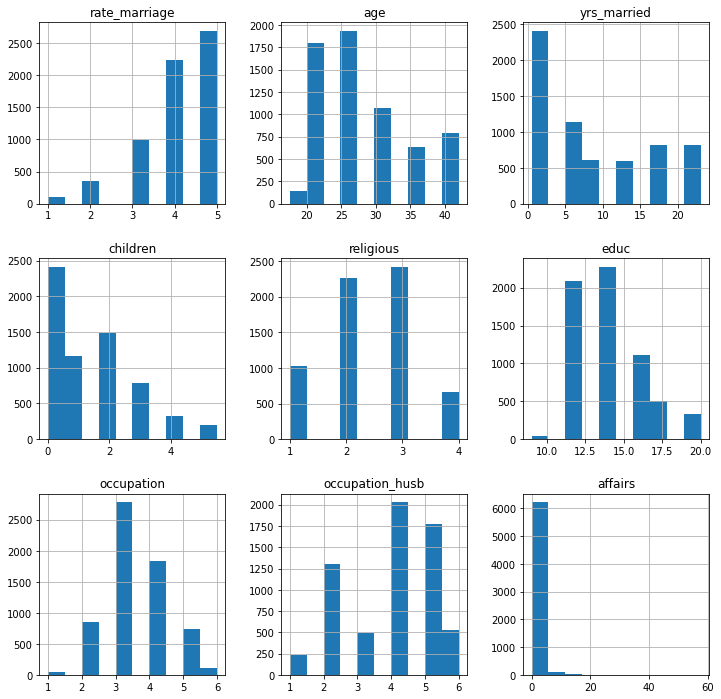

In [ ]:
df_fair.hist(figsize=(12,12))
plt.show()

### Covariance and Correlation
Covariance: A measure of the variance between two variables
$$\mathrm{cov}(X, Y) = \frac{1}{{N}} \sum\limits_{i}^{N}{(X_i – \mu_x)(Y_i – \mu_y)}$$

Correlation: A measure of the strength of a relationship between data
$$\mathrm{r}(X, Y) = \frac{\sum\limits_{i}^{N}{(X_i – \mu_x)(Y_i – \mu_y)}}{{\sqrt{\sum\limits_{i}^{N}{(X_i – \mu_x)^2}\sum\limits_{i}^{N}{(Y_i – \mu_y)^2}}}} $$



### Covariance vs. Correlation
- Both measure the relationship and the dependency between two variables.
- Covariance indicates the direction of the linear relationship between variables.
- Correlation measures both the strength and direction of the linear relationship between two variables.
- Correlation values are standardized.
- Covariance values are not standardized.

In [ ]:
corr_v = df_fair.corr()
corr_v.style.background_gradient(cmap='coolwarm')

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000


In [ ]:
corr_v.style.background_gradient(cmap='magma')

## Chi-Square Study-1
Chi-square test of independence: The hypothesis-testing procedure appropriate when both the independent variable and the dependent variables are categorical.

### Does having a poor marriage lead to affairs?

Let's create categorical data and add them as two new columns into our dataframe. <br>
 - Poor Marriage = yes, if rate_marriage <= 2 <br>
 - Affair = yes, if affair > 0

In [ ]:
df_fair_v2 = df_fair.assign(poor_marriage_yn=(df_fair.rate_marriage <= 2), affairs_yn=(df_fair.affairs > 0))
df_fair_v2

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,poor_marriage_yn,affairs_yn
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,False,True
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,False,True
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,False,True
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,False,True
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,False,True
...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,False,False
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,False,False
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,False,False
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,False,False


In [ ]:
df_fair_v2.poor_marriage_yn.value_counts()

False    5919
True      447
Name: poor_marriage_yn, dtype: int64

In [ ]:
df_fair_v2.affairs_yn.value_counts()

False    4313
True     2053
Name: affairs_yn, dtype: int64

In [ ]:
df = (df_fair_v2.groupby(['poor_marriage_yn', 'affairs_yn'])[['affairs']]
      .count().unstack().droplevel(axis=1, level=0))
df

affairs_yn,False,True
poor_marriage_yn,,
False,4161,1758
True,152,295


Note that we know the the numbers of poor marriages, we know the number of affairs but we don't know whether those pieces of data come from the same couples. In other words, these are two independent groups of observations.

Hypothesis: Assume the affair proportions are equal among poor marriages and non-poor marriages. In other other our words, null hypothesis is that "there is no correlation between marriage poornees and having affairs.

Let's test it.

In [ ]:
chi2, p, dof, ex = stats.chi2_contingency(df, correction=False)
print('chi2:', chi2)
print('p-value:', p)

chi2: 250.57470442229175
p-value: 1.9460298519537103e-56


p-value is 0 (in fact, it is a very small number, almost zero). This means that we have to reject the null hypothesis!

In fact, we could come up with the same claim just by looking at the normalized version of df. See below. Affair ratio is 30% among "non-poor marriages" and 66% among "poor marriages". So they don't have same means!

In [ ]:
df_pct = df.apply(axis=1, func=lambda r: r/r.sum())
df_pct

affairs_yn,False,True
poor_marriage_yn,,
False,0.702990,0.297010
True,0.340045,0.659955


Let's visualize this with SNS

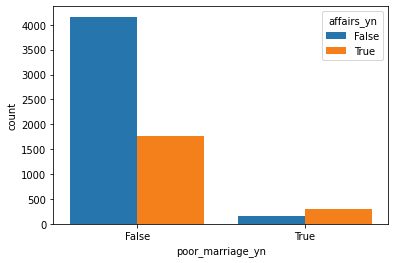

In [ ]:
sns.countplot(data=df_fair_v2,x='poor_marriage_yn', hue='affairs_yn', saturation=0.9)

### Welch's t-test
We could have used Welch's t-test to answer the same question.  

In this case, we will compare the average affair count among two groups: poor marriages and non-poor marriages!

In [ ]:
# First, let's check
df_fair_v2.groupby('poor_marriage_yn').affairs.describe()

,count,mean,std,min,25%,50%,75%,max
poor_marriage_yn,,,,,,,,
False,5919.0,0.643549,2.116982,0.0,0.0,0.000000,0.347826,57.599991
True,447.0,1.524038,3.015937,0.0,0.0,0.532609,1.507691,26.879990


They definitely have very different means!

In [ ]:
# affair counts among poor marriages
a = df_fair_v2[df_fair_v2.poor_marriage_yn].affairs
# affair counts among non-poor marriages
b = df_fair_v2[~df_fair_v2.poor_marriage_yn].affairs

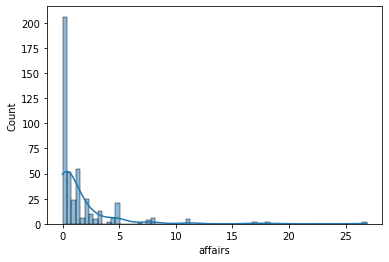

In [ ]:
sns.histplot(a, kde=True)

In [ ]:
tstats, pvalue = stats.ttest_ind(a, b, equal_var=False)
print(pvalue)

2.7446844166802127e-09


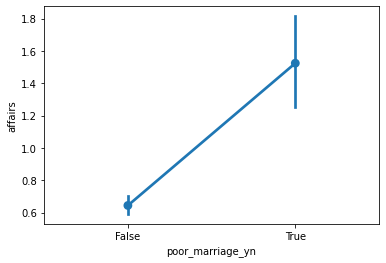

In [ ]:
# How to visualize!
sns.pointplot(data = df_fair_v2, x='poor_marriage_yn', y='affairs')

### Fisher’s Exact Test
Fisher’s Exact Test is a statistical test used to determine if the proportions of categories in two group variables significantly differ from each other.

In [ ]:
oddsr, p = stats.fisher_exact(df, alternative='two-sided')
display(oddsr,p)

4.593643344709897

4.72822285334006e-52

p-value is less than 0.05, so these two categories are significanty different than each other!

## Chi-Square Study-2
Null Hypothesis: There is no difference among farmers and business people in terms of affair averages.

Let's check

In [ ]:
df_v3 = df_fair_v2[df_fair_v2.occupation.isin([2, 6])]
df_v3

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,poor_marriage_yn,affairs_yn
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,False,True
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,False,True
12,3.0,37.0,16.5,5.5,1.0,12.0,2.0,3.0,0.484848,False,True
26,2.0,27.0,6.0,2.0,2.0,12.0,2.0,5.0,0.166667,True,True
33,4.0,32.0,16.5,5.5,4.0,12.0,2.0,4.0,0.727273,False,True
...,...,...,...,...,...,...,...,...,...,...,...
6323,4.0,22.0,2.5,0.0,3.0,20.0,6.0,6.0,0.000000,False,False
6333,5.0,22.0,0.5,0.0,3.0,14.0,2.0,2.0,0.000000,False,False
6334,4.0,22.0,2.5,1.0,3.0,14.0,2.0,4.0,0.000000,False,False
6338,5.0,42.0,23.0,2.0,3.0,12.0,2.0,2.0,0.000000,False,False


In [ ]:
df_v3_counts = (df_v3.groupby(['occupation', 'affairs_yn'])[['affairs']]
      .count().unstack().droplevel(axis=1, level=0))
df_v3_counts

affairs_yn,False,True
occupation,,
2.0,607,252
6.0,69,40


In [ ]:
chi2, p, dof, ex = stats.chi2_contingency(df_v3_counts, correction=False)
print('chi2:', chi2)
print('p-value:', p)


chi2: 2.48780700131057
p-value: 0.11473149115255787


p-value is bigger than 0.05! So we can't reject the null hypothesis. In other words, they have similar affair characteristics!

In [ ]:
df_v3_counts_normalized = df_v3_counts.apply(axis=1, func=lambda r: r/r.sum())
df_v3_counts_normalized

In [ ]:
sns.countplot(data=df_v3, x='occupation', hue='affairs_yn', saturation=0.5)

### Fisher's exact test


In [ ]:
oddsr, p = stats.fisher_exact(df_v3_counts, alternative='two-sided')
display(oddsr,p)

1.3963653094087878

0.1215293693021629

p-value is larger than 0.05. So these two categories are not significantly different than each other!

### Welch's t-test version

In [ ]:
df_fair_v2.groupby('occupation').affairs.describe()

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
1.0,41.0,0.426014,1.399035,0.0,0.0,0.0,0.000000,7.839996
2.0,859.0,0.719556,2.375644,0.0,0.0,0.0,0.212121,26.879990
3.0,2783.0,0.755248,2.305594,0.0,0.0,0.0,0.583333,57.599991
4.0,1834.0,0.555920,2.008865,0.0,0.0,0.0,0.076923,38.399994
5.0,740.0,0.815209,1.853575,0.0,0.0,0.0,0.742424,16.799988
6.0,109.0,1.194300,3.291040,0.0,0.0,0.0,1.400000,26.879990


In [ ]:
a = df_fair_v2[df_fair_v2.occupation == 2].affairs
b = df_fair_v2[df_fair_v2.occupation == 6].affairs
tstas, pvalue = stats.ttest_ind(a, b, equal_var=False)
print(pvalue)

0.14723018394566767


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


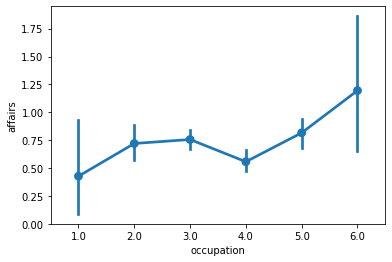

In [ ]:
sns.pointplot(df_fair_v2.occupation, y=df_fair_v2.affairs)

### Welch's t-test vs. Student's t-test
Student's t-test assumes the two populations have the same variance! If you know this is true, then you can do the student's t-test, i.e. `stats.ttest_ind(a, b)`

However, most of the time, this is not true and we have to do the Welch's t-test, i.e. `stats.ttest_ind(a, b, equal_var=False)`

In [ ]:
# stats.norm.rvs creates normal continuous random variables.
# The location (loc) keyword specifies the mean.
# The scale (scale) keyword specifies the standard deviation.

# Let's create two sample sets with the same mean and scale but different sizes
group_ctl = stats.norm.rvs(loc=120, scale=5, size=1000)
group_exp = stats.norm.rvs(loc=120, scale=5, size=20) 

In [ ]:
name_pvalue_pairs = [
    ("Student's t-test", stats.ttest_ind(group_ctl, group_exp).pvalue),
    ("Welch's t-test", stats.ttest_ind(group_ctl, group_exp, equal_var=False).pvalue)]
name_pvalue_pairs.sort(key=lambda x: x[1])

for name, p_value in name_pvalue_pairs:
    print(f'{name:26} {p_value:.4f}  {p_value < 0.05}')

Welch's t-test             0.0977  False
Student's t-test           0.2135  False


Play with the cell above by changing sizes and try to observe when test scores get closer to each other!

## Wilcoxon Signed-Rank Test
The WSR test is a non-parametric statistical hypothesis test used either 
 - to test the location of a set of samples or 
 - to compare the locations of two populations using a set of matched samples.

If $X_{1}$ and $X_{2}$ are IID F-distributed random variables, define $F^{(2)}$ to be the cumulative distribution function of $\tfrac{1}{2}(X_{1}+X_{2})$. Set 

$p_{2}=\Pr({\tfrac {1}{2}}(X_{1}+X_{2})>0)=1-F^{(2)}(0))$

Assume that $F$ is continuous. The one-sample Wilcoxon signed-rank sum test is a test for the following null hypothesis against one of the following alternative hypotheses

Null hypothesis H0
$${p_{2}={\tfrac {1}{2}}}{p_{2}={\tfrac {1}{2}}}$$
One-sided alternative hypothesis H1
$${p_{2}>{\tfrac {1}{2}}}{p_{2}>{\tfrac {1}{2}}}.$$
One-sided alternative hypothesis H2
$${p_{2}<{\tfrac {1}{2}}}{p_{2}<{\tfrac {1}{2}}}.$$
Two-sided alternative hypothesis H3
$${p_{2}\neq {\tfrac {1}{2}}}{p_{2}\neq {\tfrac {1}{2}}}$$.




### Additional Tests

In [ ]:
# now create two different groups
group_ctl = stats.norm.rvs(loc=120, scale=5, size=100)
group_exp = group_ctl + stats.norm.rvs(loc=1, scale=1, size=100)

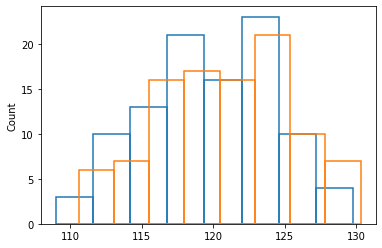

In [ ]:
sns.histplot(group_ctl, fill=False)
sns.histplot(group_exp, fill=False)

In [ ]:
name_pvalue_pairs = [
    ("Student's t-test", stats.ttest_ind(group_ctl, group_exp).pvalue),
    ("Welch's t-test", stats.ttest_ind(group_ctl, group_exp, equal_var=False).pvalue),
    ("Paired Student's t-rest", stats.ttest_rel(group_ctl, group_exp).pvalue),
    ('Mann–Whitney U test', stats.mannwhitneyu(group_ctl, group_exp).pvalue),
    ('Wilcoxon signed-rank test', stats.wilcoxon(group_ctl, group_exp).pvalue),
]
name_pvalue_pairs.sort(key=lambda x: x[1])

for name, p_value in name_pvalue_pairs:
    print(f'{name:26} {p_value:.4f}  {p_value < 0.05}')

Paired Student's t-rest    0.0000  True
Wilcoxon signed-rank test  0.0000  True
Mann–Whitney U test        0.0479  True
Student's t-test           0.0907  False
Welch's t-test             0.0907  False


## ANOVA
What is ANOVA (ANalysis Of VAriance)?
 - ANOVA test used to compare the means of more than 2 groups (t-test can be used to compare 2 groups)
 - Groups mean differences inferred by analyzing variances
ANOVA uses variance-based F test to check the group mean equality. Sometimes, ANOVA F test is also called omnibus test as it tests non-specific null hypothesis i.e. all group means are equal
 - Main types: One-way (one factor) and two-way (two factors) ANOVA (factor is an independent variable)
 - It is also called univariate ANOVA as there is only one dependent variable in the model. MANOVA is used when there are multiple dependent variables in the dataset. If there is an additional continuous independent variable in the model, then ANCOVA is used.
 - If you have repeated measurements for treatments or time on same subjects, you should use Repeated Measure ANOVA

### ANOVA Hypotheses Test
Null hypothesis: Groups means are equal (no variation in means of groups)
 - $H_0$: $\mu_1 = \mu_2 = \cdots \mu_p$
 - $H_A$: At least, one group mean is different from other groups, i..e. All $\mu$'s are not equal. <br>

The null hypothesis is tested using the omnibus test (F test) for all groups, which is further followed by post-hoc test to see individual group differences.

### ANOVA Assumptions
 - Residuals (experimental error) are approximately normally distributed (Shapiro-Wilks test or histogram)
 - homoscedasticity or Homogeneity of variances (variances are equal between treatment groups) (Levene’s, Bartlett’s, or Brown-Forsythe test)
 - Observations are sampled independently from each other (no relation in observations between the groups and within the groups) i.e., each subject should have only one response
 - The dependent variable should be continuous. If the dependent variable is ordinal or rank (e.g. Likert item data), it is more likely to violate the assumptions of normality and homogeneity of variances. If these assumptions are violated, you should consider the non-parametric tests (e.g. Mann-Whitney U test, Kruskal-Wallis test).

ANOVA is a powerful method when the assumptions of normality and homogeneity of variances are valid. ANOVA is less powerful (little effect on type I error), if the assumption of normality is violated while variances are equal.**bold text**

### How ANOVA works?
 - Check sample sizes: equal number of observation in each group
 - Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degrees of freedom (df) for a group
 - Calculate Mean Square error (MSE) (SS error/df of residuals)
 - Calculate F value (MS of group/MSE)
 - Calculate p value based on F value and degrees of freedom (df) 

In [ ]:
anova_array = [[25,	45, 30,	54],
               [30,	55,	29,	60],
               [28,	29,	33,	51],
               [36,	56,	37,	62],
               [29,	40,	27,	73]]

In [ ]:
df = pd.DataFrame(anova_array, columns =['A', 'B', 'C','D'])

In [ ]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

In [ ]:
df_melt

In [ ]:
sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [ ]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)

The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.

Note on F value: F value is inversely related to p value and higher F value (greater than F critical value) indicates a significant p value.

In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.

In [ ]:
!pip install bioinfokit

In [ ]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

Above results from Tukey’s HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis (p < 0.05) and indicates statistical significant differences.

In [ ]:
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

As the standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed.

Let's check

In [ ]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

Shapiro-Wilk test can be used to check the normal distribution of residuals. Null hypothesis: data is drawn from normal distribution.

In [ ]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

As the p value is non significant, we fail to reject null hypothesis and conclude that data is drawn from normal distribution.

As the data is drawn from normal distribution, use Bartlett’s test to check the Homogeneity of variances. Null hypothesis: samples from populations have equal variances.

In [ ]:
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'])
print(w, pvalue)

As the p value (0.12) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.

Levene’s test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.

In [ ]:
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary